In [1]:
import numpy as np
import pandas as pd
import os
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='pastel')

Lembretes:

- Criação de matrizes a partir de suas linhas: np.array([[x, y], [w, z]])
- Criação de matrizes a partir de uma sequência $k$ números com $n$ linhas e $p$ colunas: np.arange(k).reshape(n, p)
- Dimensão: X.shape
- Número de linhas (observações) $n$: X.shape[0]
- Número de colunas (variáveis) $p$: X.shape[0]
- Número de elementos na matriz: X.size

Cálculo de medidas usando o *numpy* e *pandas*:

*Numpy*
- Vetor de médias: Xp = np.mean(X, axis=0)
- Matriz de covariâncias: S = np.cov(X.T)
- Matriz de somas de quadrados e produtos: W = (n - 1) * S
- Matriz de correlações: R = np.corrcoef(X.T)

*Pandas*
- Primeiras observações: dados.head()
- Vetor de médias: Xp = dados.mean()
- Matriz de covariâncias: S = dados.cov()
- Matriz de correlações: R = dados.corr()
- Transformar *dataframe* em uma matriz: X = dados.values[:, 1:3] (quais as linhas e colunas serão usadas)



In [2]:
# amostras aleatórias
# matriz a partir de uma sequência
A = np.arange(12).reshape(3, 4)
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [3]:
# número de dimensões
A.ndim

2

In [4]:
# dimensão
A.shape

(3, 4)

In [5]:
# número de linhas (observações) n
A.shape[0]

3

In [6]:
# número de colunas (variáveis) p
A.shape[1]

4

In [7]:
# número de elementos
A.size

12

## Matriz de dados $\boldsymbol{X}_{n \times p}$
Seja $\boldsymbol{X}_{4 \times 3} =$

        7   3    9   
        4   6   11
        4   2    5  
        5   5    7

In [8]:
# dados
X = np.array([[7, 3, 9], [4, 6, 11], [4, 2, 5], [5, 5, 7]])
print(X)

[[ 7  3  9]
 [ 4  6 11]
 [ 4  2  5]
 [ 5  5  7]]


In [9]:
X.shape

(4, 3)

In [10]:
n = X.shape[0]
p = X.shape[1]
print(n, p)

4 3


## Usando o pacote *numpy*

Vetor de médias amostrais: $\boldsymbol{\bar{X}}_{p \times 1}$

In [11]:
# vetor de médias
Xb = np.mean(X, axis=0)
print('Xb = ', Xb)

Xb =  [5. 4. 8.]


Matriz de covariâncias amostrais: $\boldsymbol{S}_{p \times p}$

In [12]:
# matriz de covariâncias
S = np.cov(X.T)
print('\nS = \n', S)


S = 
 [[ 2.         -0.66666667  0.66666667]
 [-0.66666667  3.33333333  3.33333333]
 [ 0.66666667  3.33333333  6.66666667]]


Matriz de somas de quadrados e produtos: $\boldsymbol{W}_{p \times p}$

In [13]:
W = (n - 1) * S
print('\nW = \n', W)


W = 
 [[ 6. -2.  2.]
 [-2. 10. 10.]
 [ 2. 10. 20.]]


Matriz de correlações amostrais:  $\boldsymbol{R}_{p \times p}$

In [14]:
R = np.corrcoef(X.T)
print('\nR = \n', R)


R = 
 [[ 1.         -0.25819889  0.18257419]
 [-0.25819889  1.          0.70710678]
 [ 0.18257419  0.70710678  1.        ]]


Matricialmente:

Obter os vetores $\boldsymbol{X}_{1\cdot}$ $\boldsymbol{X}_{2\cdot}$, $\cdots$

In [15]:
X1p = X[0,:].reshape(3, 1)
X2p = X[1,:].reshape(3, 1)
X3p = X[2,:].reshape(3, 1)
X4p = X[3,:].reshape(3, 1)

Matricialmente, o vetor de médias amostrais é otido por:

$\boldsymbol{\bar{X}}$ = $\dfrac{1}{n} (\boldsymbol{X}_{1\cdot} + \boldsymbol{X}_{2\cdot} + \dots + \boldsymbol{X}_{n\cdot})$

In [16]:
Xb = 1 / n * (X1p + X2p + X3p + X4p)

In [17]:
print(Xb)

[[5.]
 [4.]
 [8.]]


Matricialmente, a matriz de covariâncias é otida por:

$\boldsymbol{S} = \dfrac{1}{n-1} \displaystyle \sum_{i=1}^{n}(\boldsymbol{X}_{i\cdot} - \boldsymbol{\bar{X}})(\boldsymbol{X}_{i\cdot} - \boldsymbol{\bar{X}})^T$

In [18]:
# matricialmente
S = (1 / (n - 1)) * (((X1p - Xb) @ (X1p - Xb).T) + ((X2p - Xb) @ (X2p - Xb).T) + ((X3p - Xb) @ (X3p - Xb).T) + ((X4p - Xb) @ (X4p - Xb).T))
S

array([[ 2.        , -0.66666667,  0.66666667],
       [-0.66666667,  3.33333333,  3.33333333],
       [ 0.66666667,  3.33333333,  6.66666667]])

Matricialmente, definindo $\boldsymbol{D}$ = $diag(\boldsymbol{S})$ = $diag(S_{ii})$ e $\boldsymbol{D}^{-1/2} = diag(1/\sqrt{S_{ii}})$,

$\boldsymbol{R} = \boldsymbol{D}^{-1/2}\boldsymbol{S}\boldsymbol{D}^{-1/2}$

In [19]:
# D**{-1/2}
D12 = np.diag(1 / np.sqrt(np.diag(S)))
print(D12)

[[0.70710678 0.         0.        ]
 [0.         0.54772256 0.        ]
 [0.         0.         0.38729833]]


In [20]:
# R = D12 S D12
R = D12 @ S @ D12
print('\nR = \n', R)


R = 
 [[ 1.         -0.25819889  0.18257419]
 [-0.25819889  1.          0.70710678]
 [ 0.18257419  0.70710678  1.        ]]


Parte gráfica: diagrama de dispersão

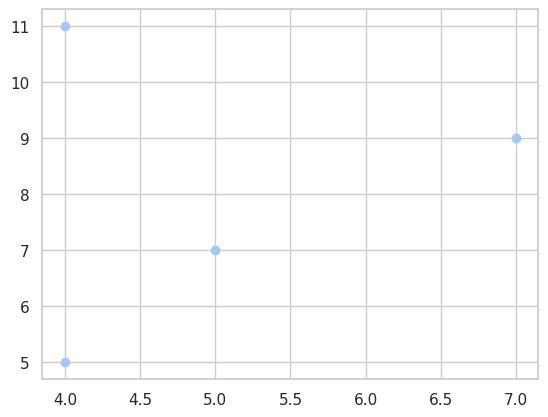

In [21]:
## Diagramas de dispersão
plt.scatter(X[:,0],X[:,2]);

## Usando o pacote pandas:

Leitura de dados a partir de um arquivo do Google Drive

In [ ]:
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Multivariada/dados')
# dados = pd.read_csv('medidas.csv', encoding='utf-8')

Leitura de dados a partir de um link:

In [22]:
dados = pd.read_csv('https://patriciasiqueira.github.io/arquivos/medidas.csv')

In [23]:
# seis primeiras observações
dados.head()

,torax,cintura,quadril,sexo
0,34,30,32,M
1,37,32,37,M
2,38,30,36,M
3,36,33,39,M
4,38,29,33,M


In [24]:
dados.shape

(20, 4)

Selecionar variáveis numéricas:

In [25]:
dados = dados.loc[:, ['torax', 'cintura', 'quadril']]

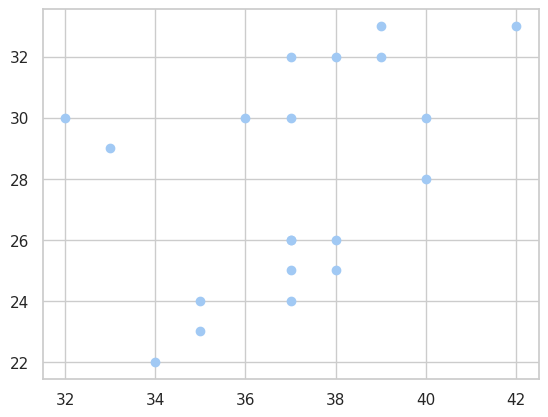

In [26]:
# diagramas de dispersão
plt.scatter(dados['quadril'],dados['cintura']);

Obter médias, covariâncias e correlações usando o pacote *pandas*

In [27]:
# médias
dados.mean()

,0
torax,37.00
cintura,28.00
quadril,37.05


In [28]:
# covariâncias
dados.cov()

,torax,cintura,quadril
torax,6.631579,6.368421,3.000000
cintura,6.368421,12.526316,3.578947
quadril,3.000000,3.578947,5.944737


In [29]:
# correlações
dados.corr()

,torax,cintura,quadril
torax,1.000000,0.698734,0.477800
cintura,0.698734,1.000000,0.414741
quadril,0.477800,0.414741,1.000000


### Transformando em matriz


In [30]:
# subselecionar variáveis e transformar em matriz
X = dados.values[:, 0:3]
X

array([[34, 30, 32],
       [37, 32, 37],
       [38, 30, 36],
       [36, 33, 39],
       [38, 29, 33],
       [43, 32, 38],
       [40, 33, 42],
       [38, 30, 40],
       [40, 30, 37],
       [41, 32, 39],
       [36, 24, 35],
       [36, 25, 37],
       [34, 24, 37],
       [33, 22, 34],
       [36, 26, 38],
       [37, 26, 37],
       [34, 25, 38],
       [36, 26, 37],
       [38, 28, 40],
       [35, 23, 35]])

In [31]:
# ou
X = dados.iloc[:, 0:3].to_numpy()
X

array([[34, 30, 32],
       [37, 32, 37],
       [38, 30, 36],
       [36, 33, 39],
       [38, 29, 33],
       [43, 32, 38],
       [40, 33, 42],
       [38, 30, 40],
       [40, 30, 37],
       [41, 32, 39],
       [36, 24, 35],
       [36, 25, 37],
       [34, 24, 37],
       [33, 22, 34],
       [36, 26, 38],
       [37, 26, 37],
       [34, 25, 38],
       [36, 26, 37],
       [38, 28, 40],
       [35, 23, 35]])

In [32]:
# mudar o tipo dos dados para real
X = np.asarray(X, dtype=float)
X

array([[34., 30., 32.],
       [37., 32., 37.],
       [38., 30., 36.],
       [36., 33., 39.],
       [38., 29., 33.],
       [43., 32., 38.],
       [40., 33., 42.],
       [38., 30., 40.],
       [40., 30., 37.],
       [41., 32., 39.],
       [36., 24., 35.],
       [36., 25., 37.],
       [34., 24., 37.],
       [33., 22., 34.],
       [36., 26., 38.],
       [37., 26., 37.],
       [34., 25., 38.],
       [36., 26., 37.],
       [38., 28., 40.],
       [35., 23., 35.]])

In [33]:
n = X.shape[0]
p = X.shape[1]
print(n, p)

20 3


In [34]:
# vetor de médias
Xb = np.mean(X, axis=0)
print(Xb)

[37.   28.   37.05]


In [35]:
# matriz de covariâncias
S = np.cov(X.T)
print(S)

[[ 6.63157895  6.36842105  3.        ]
 [ 6.36842105 12.52631579  3.57894737]
 [ 3.          3.57894737  5.94473684]]


In [36]:
# matriz de somas de quadrados e produtos
W = (n - 1) * S
print(W)

[[126.   121.    57.  ]
 [121.   238.    68.  ]
 [ 57.    68.   112.95]]


In [37]:
# matriz de correlações
R = np.corrcoef(X.T)
R

array([[1.        , 0.69873359, 0.47780035],
       [0.69873359, 1.        , 0.41474133],
       [0.47780035, 0.41474133, 1.        ]])

In [38]:
# variância total: tr(S)
S.trace()

np.float64(25.102631578947364)

In [39]:
# variância generalizada: |S|
np.linalg.det(S)

np.float64(191.79904505029873)